<a href="https://colab.research.google.com/github/matteoguida/SSI_Projects/blob/main/cf_notebooks/4.MappingDarkMatterDataChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quarks to Cosmos with AI Data Challenge: Mapping the Distribution of Dark Matter


Authors:
 - [@EiffL](https://github.com/EiffL) (Fancois Lanusse)
 - [@b-remy](https://github.com/b-remy) (Benjamin Remy)

## Overview

The aim of this data challenge is to reconstruct a map of the Dark Matter distribution in a region of the sky, through the weak gravitational lensing effect. What makes this problem challenging is that we want to not only recover an estimate of this map, but also infer a full posterior distribution.

As our data, we will use the weak lensing shape catalog from the [HSC survey](https://hsc-release.mtk.nao.ac.jp/doc/index.php/s16a-shape-catalog-pdr2/), as described in [arXiv:1705.06745](https://arxiv.org/abs/1705.06745) led by CMU's Prof. Mandelbaum.

We will also use simulation data to provide a data driven prior, for the purpose of this challenge we will use the [MassiveNuS](http://columbialensing.org/) suite of weak lensing simulations described in [arXiv:1711.10524](https://arxiv.org/abs/1711.10524) and developed by Dr. Jia Liu.

Our goal will be to produce a map and uncertainty estimates for a portion of the XMM field which you can navigate [here](https://hsc-release.mtk.nao.ac.jp/hscMap-pdr2/app/#/?_=%7B%22view%22%3A%7B%22a%22%3A0.6457718473821972,%22d%22%3A-0.0785398191711961,%22fovy%22%3A0.014250701487973602,%22roll%22%3A0%7D,%22sspParams%22%3A%7B%22type%22%3A%22SDSS_TRUE_COLOR%22,%22filter%22%3A%5B%22HSC-I%22,%22HSC-R%22,%22HSC-G%22%5D,%22simpleRgb%22%3A%7B%22beta%22%3A22026.465794806718,%22a%22%3A1,%22bias%22%3A0.05,%22b0%22%3A0%7D,%22sdssTrueColor%22%3A%7B%22beta%22%3A22026.465794806718,%22a%22%3A1,%22bias%22%3A0.05,%22b0%22%3A0%7D,%22simpleColorMatrix%22%3A%7B%22colors%22%3A%5B%7B%22filterName%22%3A%22HSC-G%22,%22enabled%22%3Atrue,%22value%22%3A%5B0,0,1%5D%7D,%7B%22filterName%22%3A%22HSC-R%22,%22enabled%22%3Atrue,%22value%22%3A%5B0,1,0%5D%7D,%7B%22filterName%22%3A%22HSC-I%22,%22enabled%22%3Atrue,%22value%22%3A%5B1,0,0%5D%7D,%7B%22filterName%22%3A%22HSC-Z%22,%22enabled%22%3Afalse,%22value%22%3A%5B0,0,0%5D%7D,%7B%22filterName%22%3A%22HSC-Y%22,%22enabled%22%3Afalse,%22value%22%3A%5B0,0,0%5D%7D,%7B%22filterName%22%3A%22NB0387%22,%22enabled%22%3Afalse,%22value%22%3A%5B0,0,0%5D%7D,%7B%22filterName%22%3A%22NB0816%22,%22enabled%22%3Afalse,%22value%22%3A%5B0,0,0%5D%7D,%7B%22filterName%22%3A%22NB0921%22,%22enabled%22%3Afalse,%22value%22%3A%5B0,0,0%5D%7D,%7B%22filterName%22%3A%22NB0527%22,%22enabled%22%3Afalse,%22value%22%3A%5B0,0,0%5D%7D,%7B%22filterName%22%3A%22NB0718%22,%22enabled%22%3Afalse,%22value%22%3A%5B0,0,0%5D%7D,%7B%22filterName%22%3A%22IB0945%22,%22enabled%22%3Afalse,%22value%22%3A%5B0,0,0%5D%7D,%7B%22filterName%22%3A%22NB0973%22,%22enabled%22%3Afalse,%22value%22%3A%5B0,0,0%5D%7D%5D,%22beta%22%3A22026.465794806718,%22a%22%3A1,%22bias%22%3A0.05,%22b0%22%3A0%7D%7D,%22externalTiles%22%3A%5B%5D,%22activeReruns%22%3A%5B%22pdr1_wide%22%5D%7D) and you can find a reference in the litterature for mapping this region of the survey in [Oguri et al. 2017](https://arxiv.org/abs/1705.06792) or more recently using an ML method in [Shirasaki et al. 2019](https://arxiv.org/abs/1911.12890). Here is the map for this region from Oguri et al:

![](https://media.arxiv-vanity.com/render-output/5136459/x3.png)


The suggested approach for solving this challenge will be based on [Remy et al. (2020)](https://arxiv.org/abs/2011.08271), Remy et al. (in prep.). This will draw on **Denoising Score Matching** approaches to learning prior distributions (see [Song and Ermon (2019)](https://arxiv.org/abs/1907.05600)).


### Learning Objectives

This challenge will be an opportunity to put into practice a number of tools and methodologies. If you follow the recommended approach, you will put into practice:
- Use Jax to write a differentiable model for weak gravitational lensing
- Use an analytic Gaussian prior to solve the inverse problem (Wiener Filtering)
- Use Denoising Score Matching to learn the score of a prior distribution
- Use Stochastic Differential Equations for sampling from the posterior

But you are also free to explore alternative approach if you so choose, as long as you are able to provide at the end of the day posterior samples from the mass-mapping problem.


### Backgroung on Weak Gravitational Lensing

We only provide here the fundamentals, and we encourage the interested reader to directly reach out to challenge organizers to learn more :-)

Our goal is to recover an estimate of a **convergence map**, noted $\kappa$, wich corresponds to a projected matter distribution on the sky. We can infer $\kappa$ from the slight graviational lensing effect that affects the image of background galaxies: the apparent ellipticity of galaxies will be slightly *sheared* by a gravitational **shear** $\gamma$. In the limit of weak lensing, the following relation holds:

$$\gamma = \mathbf{P} \kappa$$

where $\mathbf{P}$ is a linear lensing operator turning a convergence map $\kappa$ into a shear map $\gamma$.

The actual measurements are the galaxy ellipticities, which have a contribution from the actual galaxy shape $e_{int}$ and a contribution from gravitational shear $\gamma$:
$$e_{obs} = e_{int} + \gamma$$
We usual assume $e_{int}$ to be Gaussian distributed, so that the full inverse problem to solve can be stated in the following form:

$$e_{obs} = \mathbf{P} \kappa + e_{int} \qquad \mbox{with} \qquad e_{int} \sim \mathcal{N}(0, \sigma_e^2)$$

Our goal in this challenge will be to sample the posterior $p(\kappa | e_{obs})$.

E and B modes: One last complication is that the convergence field can actually have E and B modes. Lensing to first order should only produce E modes, B modes should be 0. This notion of E and B modes will show up later in the notebook.

## Step I: Data Preparation

The shape catalog we are using can be retrieved from the HSC data release website as described [here](https://hsc-release.mtk.nao.ac.jp/doc/index.php/s16a-shape-catalog-pdr2/). For convenience we have already run the query specifically for a portion of the XMM field, and the resulting catalog is stored in the cloud. Here is the exact query:
```sql
select
 b.*, c.ira, c.idec, a.ishape_hsm_regauss_e1, a.ishape_hsm_regauss_e2, d.*
from
 s16a_wide.meas2 a
 inner join s16a_wide.weaklensing_hsm_regauss b using (object_id)
 inner join s16a_wide.meas c using (object_id)
 inner join s16a_wide.photoz_mlz d using (object_id)
 where s16a_wide.search_xmm(c.skymap_id)
 AND c.ira > 34
```


In the rest of this section, we will be doing some data preparation, some points are slightly technical but don't worry about understanding everything as this will not matter for the rest of the challenge.

## Installing dependencies and accessing data

In [1]:
!pip install git+https://github.com/EiffL/Quarks2CosmosDataChallenge.git
!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
!apt -qq update
!apt -qq install gcsfuse
!mkdir galsim

import logging
logger = logging.getLogger()
class CheckTypesFilter(logging.Filter):
    def filter(self, record):
        return "check_types" not in record.getMessage()
logger.addFilter(CheckTypesFilter())

  Cloning https://github.com/EiffL/Quarks2CosmosDataChallenge.git to /tmp/pip-req-build-blssu22u
  Running command git clone --filter=blob:none --quiet https://github.com/EiffL/Quarks2CosmosDataChallenge.git /tmp/pip-req-build-blssu22u
  Resolved https://github.com/EiffL/Quarks2CosmosDataChallenge.git to commit aa403e75b46f48c58e52493f6390585df2166f7b
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.3/360.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.4/287.4 kB 24.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 18.3 MB/s eta 0:00:00
  Created wheel for quarks2cosmos: filename=quarks2cosmos-0.0.1-py3-none-any.whl size=24611 sha256=e67176bc0c27ae7b9b8a0c675c4a4349749cade7f043fdca03854c8e22453f9d
  Stored in directory: /tmp/pip-ephem-wheel-cache-29a3avin/wheels/1c/82/3d/d

In [2]:
# Authenticating and mounting cloud data storage
from google.colab import auth
auth.authenticate_user()
!gcsfuse --implicit-dirs galsim galsim

I0814 23:12:23.715122 2023/08/14 23:12:23.715076 Start gcsfuse/1.0.1 (Go version go1.20.5) for app "" using mount point: /content/galsim


In [3]:
%pylab inline
import jax
import numpy as np
import jax.numpy as jnp
from astropy.table import Table

Populating the interactive namespace from numpy and matplotlib


### Loading shape catalog

For the purpose of this challenge, we will only use a 3x3 deg region of the XMM field (to keep things computationnally easy). Our first step here is to load the catalog and only keep a given region.

In [4]:
cat = Table.read('galsim/hsc_catalog_xmm.fits')

In [5]:
survey_cut = (cat['ira']>35.5) * (cat['ira']<38.5) * (cat['idec']>-6) * (cat['idec']<-3)

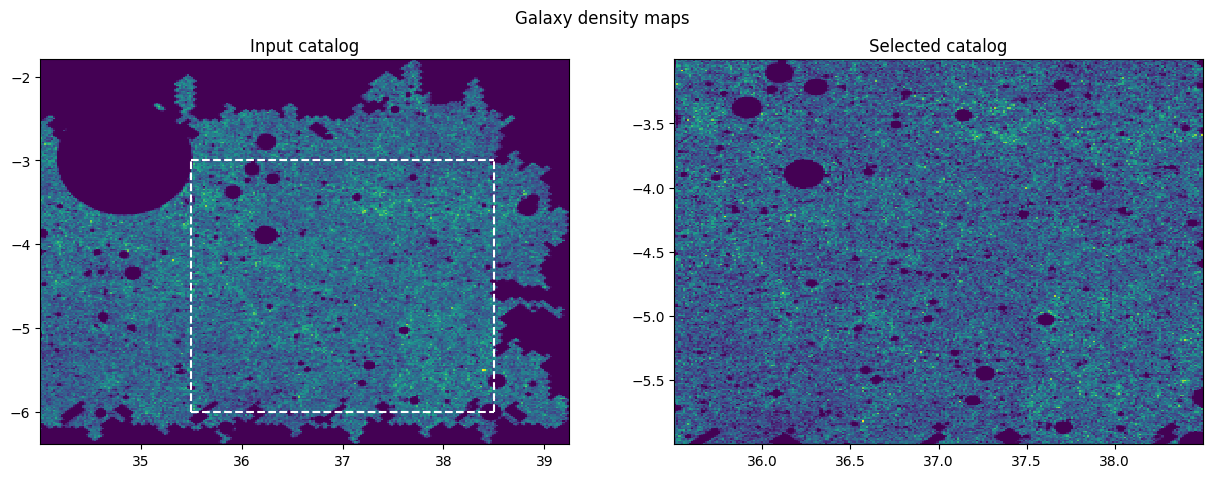

In [6]:
figure(figsize=[15,5])
subplot(121)
title('Input catalog')
hist2d(cat['ira'], cat['idec'], 256);
hlines(y=-3,xmin=35.5, xmax=38.5, color='w', linestyle='--')
hlines(y=-6,xmin=35.5, xmax=38.5, color='w', linestyle='--')
vlines(x=35.5,ymin=-6, ymax=-3, color='w', linestyle='--')
vlines(x=38.5,ymin=-6, ymax=-3, color='w', linestyle='--')

subplot(122)
hist2d(cat['ira'][survey_cut], cat['idec'][survey_cut], 256);
title('Selected catalog')
cat = cat[survey_cut]
suptitle('Galaxy density maps');

The plot above shows us where galaxies in our sample are distributed on the sky, the holes correpond to either regions that have not been fully surveyed yet, or that are masked because of the presence of a bright star.

Another important aspect of the sample, from the analysis point of view, is to determine the redshift distribution of our galaxies, which determines how much lensing we should expect. We will just use a rough estimate here using the MLZ redshifts included in the catalog, and mostly only care about the mean redshift (**Note**: this is an overly simpltistic redshift determination, do not use directly for a science paper.)

Mean redshift 0.9701822


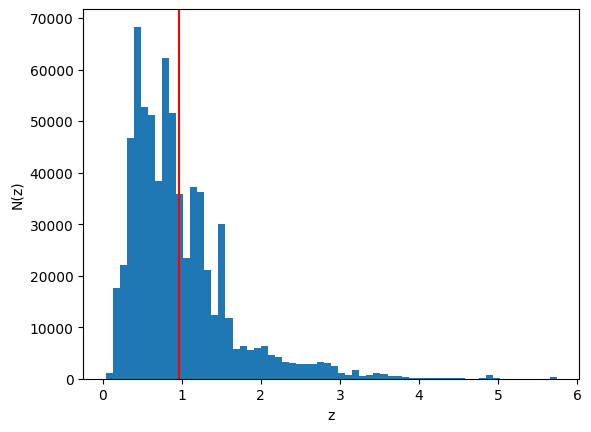

In [7]:
hist(cat['photoz_best'], 64);
xlabel('z')
ylabel('N(z)')
axvline(mean(cat['photoz_best']),color='red')
print('Mean redshift', np.mean(cat['photoz_best']))

This plot tells us that the mean redshift of our sample is z=1. This will be important for later ;-)

### Applying shear calibration

In the introduction we oversimplified the relationship between observed ellipticity and shear. In practice it is necessary to calibrate this relation. This is for instance described in [Oguri et al. 2017](https://arxiv.org/abs/1705.06792).

In [8]:
# We need to convert ellipticity to shear and calibrate it
# Step I: computing the shear responsivity
R = 1 - np.sum( cat['ishape_hsm_regauss_derived_shape_weight'] *
                cat['ishape_hsm_regauss_derived_rms_e']**2) / np.sum(cat['ishape_hsm_regauss_derived_shape_weight'])

# Step II: computing mean multiplicative bias factor
mbar = np.sum( cat['ishape_hsm_regauss_derived_shape_weight'] *
               cat['ishape_hsm_regauss_derived_shear_bias_m']) / np.sum(cat['ishape_hsm_regauss_derived_shape_weight'])

cat['gamma1'] = 1./(1+mbar)*(cat['ishape_hsm_regauss_e1']/(2 * R) -
                             cat['ishape_hsm_regauss_derived_shear_bias_c1'])

cat['gamma2'] = 1./(1+mbar)*(cat['ishape_hsm_regauss_e2']/(2 * R) -
                             cat['ishape_hsm_regauss_derived_shear_bias_c2'])

The important point of what happens here is that these new columns that we will call $\gamma_{obs}$, derived from measured ellipticities `ishape_hsm_regauss_e1/2` should now follow the relation:
$$\gamma_{obs} = \gamma + n$$
where $n$ is again assumed to be a Gaussian noise.

### Creating maps of binned ellipticity

Our next step is to create maps by binning the ellipticities of galaxies on a grid using the [lenspack](https://github.com/CosmoStat/lenspack/tree/master/lenspack) library.

In [9]:
from lenspack.utils import bin2d
from quarks2cosmos.utils import get_extend_radec

# Compute boundaries of the field so that it fits in a 360x360 map
# MassiveNuS maps beging 512x512 with 0.4 arcmin resolution, we resize them to 360x360
resolution = 512/360*0.4                     # Pixel resolution in arcmin/pixel
pixel_size = np.pi * resolution / 180. / 60. # Pixel resolution in rad/pixel

width = 360                                  # Number of pixels in output map
size = width * resolution / 60.              # Angular size of output map in deg.

# Compute center of the catalog
ra = median(cat['ira'])
dec = median(cat['idec'])

# Determine extent of our map
extent = [ra - size/2, ra + size/2, dec - size/2, dec + size/2]

**Number of galaxy per pixel map**

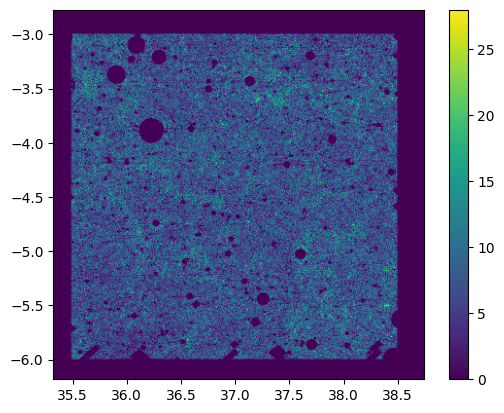

In [10]:
# Make a map of number of galaxies per pixels
n_gal_map = bin2d(cat['ira'], cat['idec'], npix=width, extent=extent)
imshow(n_gal_map, origin='lower', extent=get_extend_radec(resolution, width,ra, dec)); colorbar()

**Survey mask**

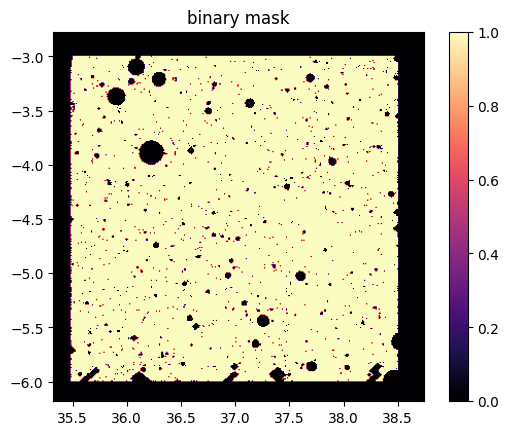

In [11]:
# Compute survey mask indicating regions where no galaxies are observed
m = n_gal_map == 0
mask = 1. - m
imshow(mask, cmap='magma', origin='lower', extent=get_extend_radec(resolution, width, ra, dec))
colorbar()
title("binary mask")
mask = np.expand_dims(mask, -1)

**Ellipticity maps**

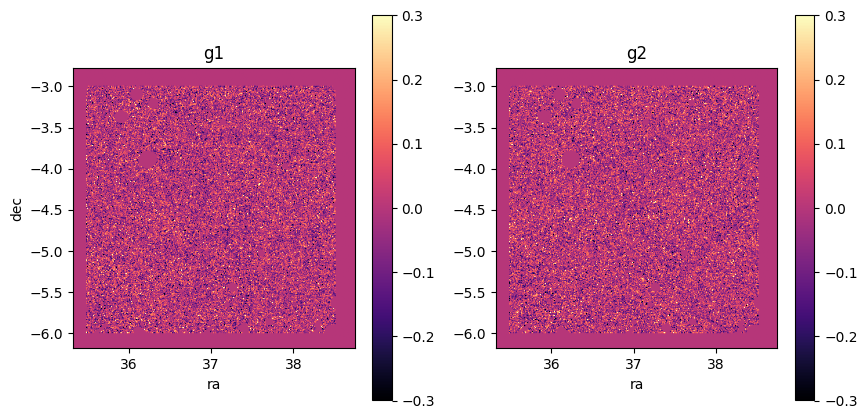

In [12]:
# Bin ellipticity components based on galaxy position into a 360x360 map
g1map, g2map = bin2d(cat['ira'], cat['idec'],
                     v=(cat['gamma1'], cat['gamma2']),
                     w=cat['ishape_hsm_regauss_derived_shape_weight'],
                     npix=width,
                     extent=extent)

figure(figsize=[10,5])
subplot(121)
imshow(g1map, cmap='magma', origin='lower', extent=get_extend_radec(resolution, width, ra, dec),vmin=-0.3,vmax=0.3)
colorbar()
xlabel('ra')
ylabel('dec')
title('g1')

subplot(122)
imshow(g2map, cmap='magma', origin='lower', extent=get_extend_radec(resolution, width, ra, dec),vmin=-0.3,vmax=0.3)
colorbar()
xlabel('ra')
title('g2')

# This will act as our input data
g_obs = np.stack([g1map, g2map], axis=-1)

**Noise covariance matrix**

<ipython-input-24-d2a4ef92aade>:2: RuntimeWarning: divide by zero encountered in divide
  sigma_g1 = np.std(cat['gamma1'])/np.sqrt(n_gal_map)
<ipython-input-24-d2a4ef92aade>:4: RuntimeWarning: divide by zero encountered in divide
  sigma_g2 = np.std(cat['gamma2'])/np.sqrt(n_gal_map)


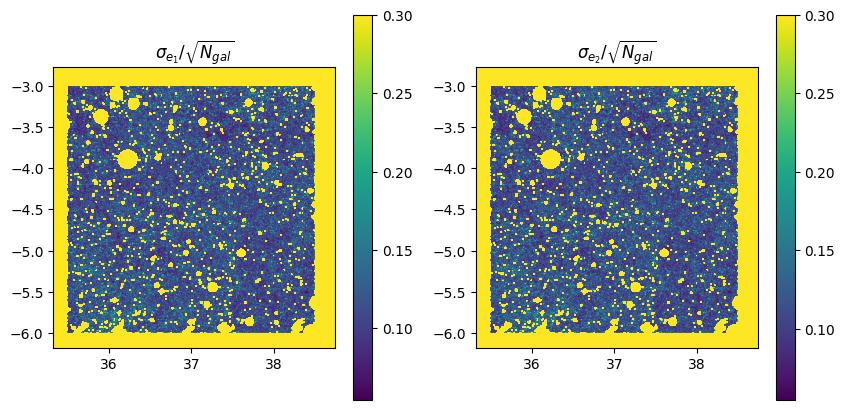

In [24]:
m = n_gal_map == 0
sigma_g1 = np.std(cat['gamma1'])/np.sqrt(n_gal_map)
sigma_g1[m] = 1e3 # Setting unobserved pixels to high noise
sigma_g2 = np.std(cat['gamma2'])/np.sqrt(n_gal_map)
sigma_g2[m] = 1e3 # Setting unobserved pixels to high noise

figure(figsize=[10, 5])
subplot(121)
imshow(sigma_g1, extent=get_extend_radec(resolution, width, ra, dec),vmax=0.3, origin='lower')
title(r'$\sigma_{e_1}/\sqrt{N_{gal}}$')
colorbar()

subplot(122)
imshow(sigma_g2, extent=get_extend_radec(resolution, width, ra, dec),vmax=0.3, origin='lower')
title(r'$\sigma_{e_2}/\sqrt{N_{gal}}$')
colorbar()

# This will be our estimate of the noise covariance in the shear map
g_obs_std = jnp.stack([sigma_g1, sigma_g2],axis=-1)

What we see in these maps of the standard deviation in the observed g1, g2 is that because of masked regions and varying number of galaxies per pixels, the expected noise can differ significantly from pixel to pixel.

### Summary of available data

At this point, our data is all prepared. In the next steps of the notebook, we will use these two arrays:
- `g_obs`: [360,360,2] contains the two components of the measured shear
- `g_obs_std`: [360,360,2] contains the standard deviation of noise (coming from intrinsic galaxy ellipticity)

## Step II: Traditional Mass-Mapping using the Kaiser-Squires estimator

Before diving into anything more complicated, we will use the standard reconstruction technique, proposed in
[Kaiser-Squires (1993)](https://ui.adsabs.harvard.edu/abs/1993ApJ...404..441K/abstract).

This consists in a "direct inversion" by inverting the lensing operator $\mathbf{P}$:
$$ \tilde{\kappa} = \mathbf{P}^{-1} (\gamma + n) $$

This solution would actually work in the limit of no missing data. Contrary to operators like a PSF convolution, inverting this lensing operator $\mathbf{P}$ preserves the noise properties (no noise amplification) and in the absence of noise would perfectly recover the convergence.

In practice however, noise and missing data (masked areas) corrupt the output map. It is conventional to apply a Gaussian smoothing to at least reduce the noise variance in the reconstructed map.


We will use a concrete implementation of the $\mathbf{P}$ operator provided as part of the `quarks2cosmos` package, using FFTs under the hood, and written in Jax (this will be usefull for later ;-) )

In [14]:
from quarks2cosmos.lensing import ks93
from scipy.ndimage import gaussian_filter

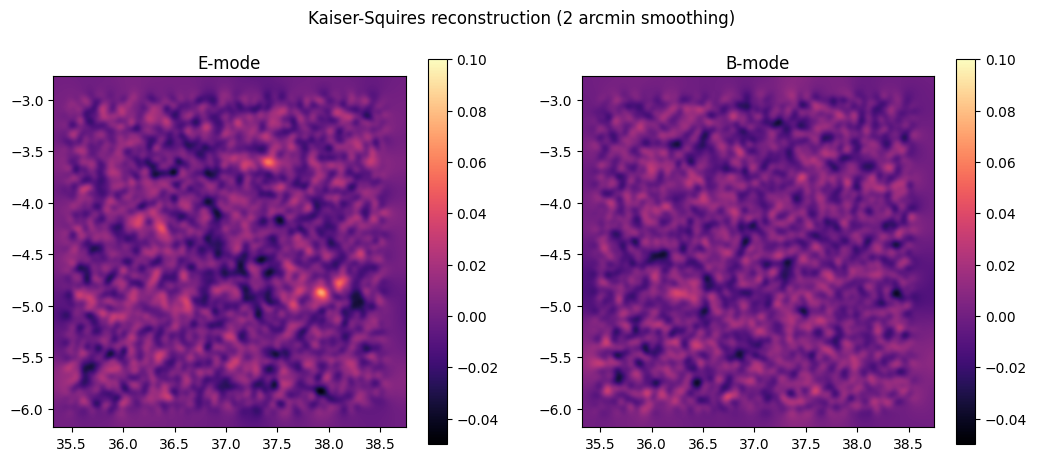

In [15]:
kappaE, kappaB = ks93(g1map, g2map) # This computes P^{1} \gamma

smoothing = 2 / resolution # smoothing in pixel units corresponding to 2 arcmin

kwargs = dict(vmin=-.05, vmax=.1, cmap='magma', extent=get_extend_radec(resolution, width, ra, dec), origin='lower')
figure(figsize=[12.5,5])
subplot(121)
imshow(gaussian_filter(kappaE,smoothing), **kwargs);colorbar()
title('E-mode')
subplot(122)
imshow(gaussian_filter(kappaB,smoothing), **kwargs);colorbar()
title('B-mode')

suptitle('Kaiser-Squires reconstruction (2 arcmin smoothing)');

Congratulations! If you have never done that before, you have just made your first dark matter map from weak gravitational lensing!


What we see here is that we see some high intensity peaks in the E-mode (which is where we expect physical lensing signal) and no discernable features in the B-mode map (which should only contain noise).

## Step III: Let's start to get creative! Writing a Wiener filter in Jax


The Kaiser-Squires inversion is a maximum likelihood approach, which doesn't assume a prior on the signal, it therefore cannot correct in any way the impact of noise and missing data.


We can now try to solve the inverse problem by optimization, and we can start by assuming an analytic Gaussian prior on the convergence field, this should allow us to compute easily a Maximum a Posterior (MAP) solution.

The idea here is that we will want to compute the maximum of the following distribution:

$$p(\kappa | \gamma_{obs}) \  \propto \  p(\gamma_{obs} | \kappa) \ p_{gaussian}(\kappa)  $$

More precisely, we will compute this MAP solution (also known as the Wiener filter solution in the case of a Gaussian prior) as:

$$ \kappa_{W} = \arg\max_{\kappa} \log p(\gamma_{obs} | \kappa) + \log p_{gaussian}(\kappa)  $$


### Challenge objectives

You can now start to apply what you will have seen in the guided tutorial. In this section, you will need to build the following:

- [x] : Build a Gaussian prior function in Jax (I'm helping for this one ;-) you are welcome)
- [ ] : Build a likelihood function in Jax and TensorFlow Probability
- [ ] : Write an optimization loop to obtain the Wiener solution

#### Build theoretical Gaussian prior

Here we will use Cosmology theory to predict the expected power spectrum of the convergence field, for a given set of cosmological parameters and redshift distribution. We'll use the handy [jax-cosmo](https://github.com/DifferentiableUniverseInitiative/jax_cosmo) library for that.

If you are not a cosmologist, you may safely go quicly over this section. Ask challenge organizers if you have any questions ;-)

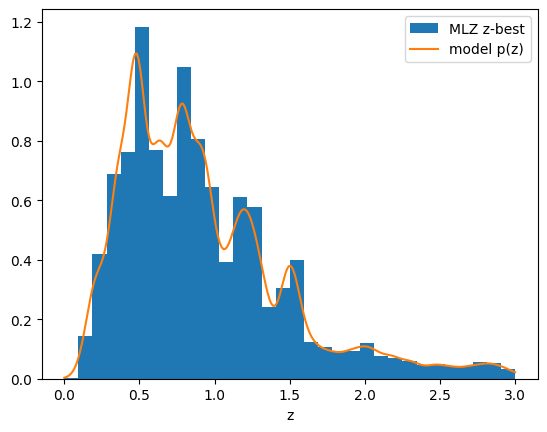

In [16]:
import jax_cosmo as jc

# Create model of the redshift distribution
pz = jc.redshift.kde_nz(jnp.array(cat['photoz_best'][:10000].astype('float32')),
                        jnp.ones(10000), bw=0.05)
z = jnp.linspace(0,3,256)

hist(cat['photoz_best'], 32,range=[0,3],density=True, label='MLZ z-best');
plot(z, pz(z), label='model p(z)');
xlabel('z');
legend();

In [17]:
@jax.jit
def theory_cl(ell):
    """ Computes angular C_ell for our survey, at given ell
    """
    cosmo = jc.Planck15()
    tracer = jc.probes.WeakLensing([pz])
    return jc.angular_cl.angular_cl(cosmo, ell, [tracer])[0]

/usr/local/lib/python3.10/dist-packages/jax/_src/numpy/array_methods.py:728: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return getattr(self.aval, name).fun(self, *args, **kwargs)


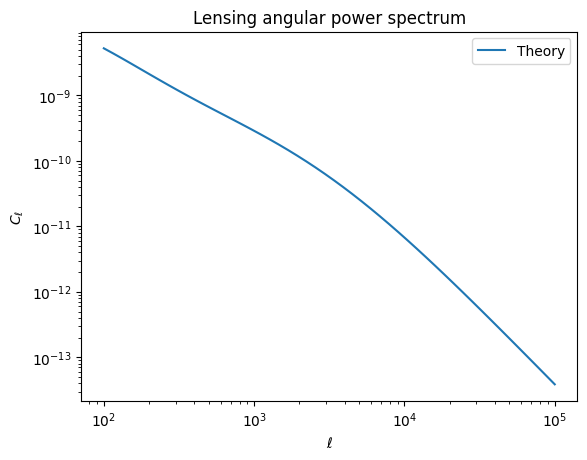

In [18]:
ell = jnp.logspace(2,5)
loglog(ell, theory_cl(ell), label='Theory');
xlabel('$\ell$')
ylabel('$C_\ell$')
title('Lensing angular power spectrum');
legend();

Given this theory power spectrum, we now just need to write a function that will compute the log prior value for a given map:

$$ \log p_{Gaussian}(\kappa) = - \frac{1}{2} \frac{\hat{\kappa}^*\hat{\kappa}}{ \mathbf{S}} + cst$$

where $\hat{\kappa}$ is the Fourier transform of the convergence field, annd $\mathbf{S}$ is the theory power spectrum shown above.

In [19]:
from quarks2cosmos.lensing import make_power_map

# Computing theory power spectrum
ell = jnp.logspace(0,5,256)
ps = theory_cl(ell)
ps_data = jnp.stack([ell, ps])

# Build diagonal covariance matrix S
S = make_power_map(ps_data, size=360, pixel_size=pixel_size, ell=True)

def log_gaussian_prior(kappa):
    """ Computes the log gaussian prior using theoretical power spectrum
        Args:
            kappa: [360,360,2] array of E and B components of convergence
        Returns:
            Value of log prior
    """
    kE_ft = jnp.fft.fft2(kappa[...,0]) / 360. # Normalisation by size of map
    kB_ft = jnp.fft.fft2(kappa[...,1]) / 360.
    k_ft = jnp.stack([kE_ft, kB_ft],axis=-1)

    # For the E mode, we use the S matrix as the prior
    # For the B mode, since they should be 0 from theory, we have a very low amplitude prior
    variance = jnp.stack([S,                      # E mode prior
                          jnp.ones_like(S)*1e-9], # B mode prior
                          axis=-1)

    return -0.5*jnp.sum(jnp.abs(k_ft*jnp.conj(k_ft)) / (variance))

In [20]:
# We can now for instance evaluate the log prior of the Kaiser-Squires solution
k_KS = jnp.stack([kappaE, kappaB],axis=-1)

log_gaussian_prior(k_KS)

Array(-7.410498e+11, dtype=float32)

Ok, so the prior is very low for the KS solution.... probably because the prior really doesn't like the non-zero B mode

**Summary** :  We now have a `log_gaussian_prior` function that returns $\log p_{Gaussian}(\kappa)$



#### Build data likelihood

This section is now up to you, remember that you have the following elements at your disposal:
- `g_obs`: [360,360,2] contains the two components of the measured shear
- `g_obs_std`: [360,360,2] contains the standard deviation of noise (coming from intrinsic galaxy ellipticity)

We need to complete the function below:

In [21]:
from tensorflow_probability.substrates import jax as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

In [22]:
from quarks2cosmos.lensing import ks93inv

def log_likelihood(kappa):
    """ Computes the log likelihood of observed shear for a given convergence map
        Args:
            kappa: [360,360,2] array of E and B components of convergence
        Returns:
            Value of log likelihood p(g_obs | \kappa)
    """
    # Build the forward model that goes form convergence (k_KS) to shear (g_obs)

    kappaE = kappa[...,0]
    kappaB = kappa[...,1]

    g = ks93inv(kE=kappaE, kB=kappaB)

    # Write down the likelihood distribution of the data
    likelihood = tfd.xxx#....

    # What should be in this xxxxx ?
    return likelihood.log_prob(xxxxx)

In [ ]:
# g_obs = np.stack([g1map, g2map], axis=-1)
# kappaE, kappaB = ks93(g1map, g2map)
# k_KS = jnp.stack([kappaE, kappaB],axis=-1)

In [23]:
# If everything works, you should be able to run this:
log_likelihood(k_KS)

NameError: ignored

#### Write an optimizer to retrieve MAP solution

In [ ]:
# We will need a function that return the log posterior
log_posterior = lambda x: xxxxxx

In [ ]:
# Initialize an optimizer and a variable

# Create an optimization param
x = jnp.zeros([360, 360, 2])

# ....

In [ ]:
# write an update function
@jax.jit
def update(x, opt_state):
    # ....
    return logp, x, opt_state

In [ ]:
# Run the optimization
losses = []
for i in range(200):
    logp, x, opt_state = update(x, opt_state)
    losses.append(logp)

In [ ]:
# Plotting the loss function
loglog(abs(np.array(losses)))

In [ ]:
# Here is the result
figure(figsize=[15,5])
subplot(131)
imshow(gaussian_filter(kappaE,smoothing),**kwargs)
title('Kaiser-Squires E-mode')
subplot(132)
imshow(x[...,0],**kwargs);
title('Wiener E-mode')
subplot(133)
imshow(x[...,1],**kwargs);
title('Wiener B-mode');

In [ ]:
from quarks2cosmos.lensing import measure_power_spectrum

# We can also compute the power spectra of these various maps
ell, ps_ks = measure_power_spectrum(kappaE,
                                      pixel_size=pixel_size)

ell, ps_ks_smooth = measure_power_spectrum(gaussian_filter(kappaE,smoothing),
                                      pixel_size=pixel_size)

ell, ps_wiener = measure_power_spectrum(x[...,0],
                                        pixel_size=pixel_size)

cl  = theory_cl(ell)

In [ ]:
loglog(ell, cl,color='gray',label='Theory')
loglog(ell, ps_ks, color='C1', label='Kaiser-Squires')
loglog(ell, ps_ks_smooth, '--', color='C1', label='Kaiser-Squires Smoothed')

loglog(ell, ps_wiener,color='red', label='Wiener')
legend()
xlim(2e2,1e4)
ylim(1e-13,1e-7)
xlabel('Angular Multipole ${\ell}$');
ylabel('$C_{\ell}$');

All right :-) So did you retrieve a MAP solution? If so, don't hesitate to share with the group!

## Taking the training wheels off: Can you propose a solution with Machine Learning?

Thanks for bearing with the introduction of this notebook! You now should have all you need to take on this challenge by yourself, using the tools above and the methodologies that will be presented in the guided challenge.


**The goal**: sample from the full posterior:

$$ p(\kappa | \gamma_{obs}) \propto p(\gamma_{obs} | \kappa) p(\kappa) $$

And instead of using an analytic Gaussian prior, learn this prior from simulations.


To provide some guidance, here would be a good set of steps to follow:

- Learn a score model using Denoising Score Matching
- Use an SDE-based sampler to sample solutions from the posterior using only the score

We will see these notions in the Guided challenge. But you can also try any other approach, for instance a VAE... but good luck with that :-P




### Load the MassiveNuS convergence dataset

The only help you will get in this section is how to access the set of simulations we can use to learn the prior. We are using the MassiveNuS dataset [(Liu et al 2017)](https://arxiv.org/abs/1711.10524), available at  http://www.columbialensing.org/#massivenus.

These simulations contain simulated convergence maps of 512x512 pixels, representing an area of 12.25 deg^2, i.e. with 0.4 arcmin resolution. The convergence maps are available for a few source redshifts. For the purpose of this challenge, we have selected the simulations at the fiducial cosmology, and only used the source plane $z_s=1$ as it corresponds to the mean redshift of our lensing sample.

**Note**: There are several caveats with this setting, first of all using a single source plane at the mean redshift is not good enough, second MassiveNuS have limited resolution and shouldn't be trusted down to the arcmin resolution. If you are interested in doing a full scientifically exploitable map, have a look at the simulations used in [Shirasaki et al. 2019](https://arxiv.org/abs/1911.12890)


Below you will find the code needed to load these maps and resize them to the pixel resolution we use in this notebook (leading to 360x360 maps).

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import quarks2cosmos.datasets

In [ ]:
def map_fn(example):
    # Apply data augmentation
    k = tf.expand_dims(example['map'], -1)
    k = tf.image.flip_left_right(k)
    k = tf.image.flip_up_down(k)

    # Apply image reampling to 360x360 but preservin
    k = tf.image.resize(k, [360, 360],
                        method=tf.image.ResizeMethod.AREA)

    # Removing batch dimension
    return k[...,0]

In [ ]:
massive_nu = tfds.load('MassiveNu', split=tfds.Split.TRAIN,
                       data_dir='galsim/tensorflow_datasets')
massive_nu = massive_nu.map(map_fn)

In [ ]:
dset = massive_nu.as_numpy_iterator()

In [ ]:
m = next(dset)

In [ ]:
figure(figsize=[10,10])
imshow(m)